## Logistics Supply Dashboard

In [92]:
# Main Library
from datetime import datetime

import pandas as pd
import numpy as np

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Load Dataset
dataset = pd.read_csv("dataset/dataset-supply.csv", parse_dates=['Ship Date'])
dataset["Month"] = dataset['Ship Date'].dt.month
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ship Date     8092 non-null   datetime64[ns]
 1   Month         8092 non-null   int32         
 2   Year          8092 non-null   int64         
 3   Ship Mode     8092 non-null   object        
 4   Area          8092 non-null   object        
 5   Region        8092 non-null   object        
 6   Category      8092 non-null   object        
 7   Sub-Category  8092 non-null   object        
 8   Sold          8092 non-null   int64         
 9   Profit        8092 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(3), object(5)
memory usage: 600.7+ KB


### Pivot Table Analysis - Hardcord

In [94]:
df_month = pd.pivot_table(data=dataset, values="Sold", index="Category", columns="Month", aggfunc="sum")

df_month.columns = dataset["Month"].sort_values(ascending=True).unique().tolist()

df_month.reset_index()

,Category,1,2,3,4,5,6,7,8,9,10,11,12
0,Furniture,21570,10910,28990,25230,28980,38860,35480,26100,71850,33140,73460,94320
1,Office Supplies,36320,21870,48360,39660,41430,48860,40400,57120,85820,48670,89570,92980
2,Technology,27250,28090,64340,45610,53920,53710,46950,45770,73810,87480,102240,92780


In [95]:
df_area = pd.pivot_table(data=dataset, values="Sold", index="Category", columns="Area", aggfunc="sum")

df_area.columns = dataset["Area"].sort_values(ascending=True).unique().tolist()

df_area.reset_index()

,Category,Bali,Jawa,Kalimantan,Papua,Sulawesi,Sumatra
0,Furniture,69880,53430,103160,94320,92870,75230
1,Office Supplies,81500,90510,125980,133000,116750,103320
2,Technology,93280,107560,131800,161040,137640,90630


In [96]:
def sales_pivot(df, columns, columns_name):

    # Calculate Pivot
    df = pd.pivot_table(data=df, values="Sold", index="Category", columns=columns, aggfunc="sum")
    df.columns = columns_name
    df = df.reset_index()

    # Return Values
    return df

In [97]:
df_month = sales_pivot(df=dataset, columns="Month", columns_name=dataset["Month"].sort_values().unique().tolist())
print(df_month)

          Category      1      2      3      4      5      6      7      8      9     10      11     12
0        Furniture  21570  10910  28990  25230  28980  38860  35480  26100  71850  33140   73460  94320
1  Office Supplies  36320  21870  48360  39660  41430  48860  40400  57120  85820  48670   89570  92980
2       Technology  27250  28090  64340  45610  53920  53710  46950  45770  73810  87480  102240  92780


In [98]:
df_year = sales_pivot(df=dataset, columns="Year", columns_name=dataset["Year"].sort_values().unique().tolist())
print(df_year)

          Category    2014    2015    2016    2017
0        Furniture  100460  116160  136660  135610
1  Office Supplies  132840  126560  170940  220720
2       Technology  119840  152660  208900  240550


In [99]:
df_ship_mode = sales_pivot(df=dataset, columns="Ship Mode", columns_name=dataset["Ship Mode"].sort_values().unique().tolist())
print(df_ship_mode)

          Category  First Class  Same Day  Second Class  Standard Class
0        Furniture        72430     23700        106740          286020
1  Office Supplies        94410     28890        146260          381500
2       Technology       128840     49340        130040          413730


In [100]:
df_area = sales_pivot(df=dataset, columns="Area", columns_name=dataset["Area"].sort_values().unique().tolist())
print(df_area)

          Category   Bali    Jawa  Kalimantan   Papua  Sulawesi  Sumatra
0        Furniture  69880   53430      103160   94320     92870    75230
1  Office Supplies  81500   90510      125980  133000    116750   103320
2       Technology  93280  107560      131800  161040    137640    90630


In [101]:
df_region = sales_pivot(df=dataset, columns="Region", columns_name=dataset["Region"].sort_values().unique().tolist())
print(df_region)

          Category  Central    East   South    West
0        Furniture    79310  123000   86150  200430
1  Office Supplies   138590  184870  109370  218230
2       Technology   148800  219890  109220  244040


### Pivot Table Analysis - Soft Code

- Analyze Profit

In [102]:
def category_profit(df, category):

    sum_profit = df.query("Category == @category")["Profit"].sum()
    sum_profit = "{:,}".format(sum_profit)

    return sum_profit

In [103]:
furniture = category_profit(dataset, 'Furniture')
furniture

'946,090,000'

In [104]:
office_supplies = category_profit(dataset, 'Office Supplies')
office_supplies

'2,142,769,900'

In [105]:
technology = category_profit(dataset, 'Technology')
technology

'2,208,134,900'

In [106]:
# Sum of profit on all category
total_profit = "{:,}".format(dataset["Profit"].sum())
total_profit

'5,296,994,800'

- Analyze Unpivot

In [107]:
category = "Office Supplies" # Office Supplies, Furniture, Technology

In [108]:
def unpivot(df, category):

    # Process unpivot
    df = pd.melt(df.query("Category == @category"), id_vars=["Category"], var_name="Labels", value_name="Values")

    # Calculate percent
    df["Percent"] = np.round((df["Values"] / df["Values"].sum()) * 100)

    # Show results
    # df = df.sort_values(by=["Percent"], ascending=True).tail(4)

    return df

In [109]:
df = unpivot(df_month, category)
df.tail(3)

,Category,Labels,Values,Percent
9,Office Supplies,10,48670,7.0
10,Office Supplies,11,89570,14.0
11,Office Supplies,12,92980,14.0


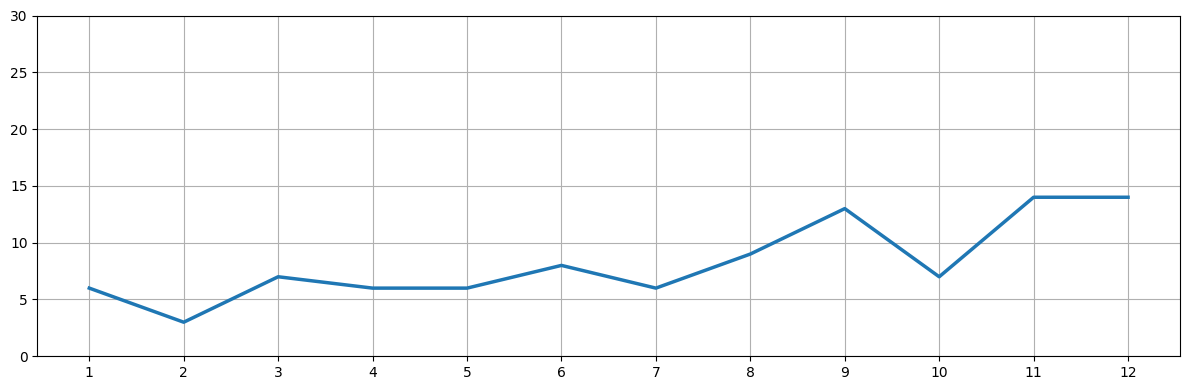

In [110]:
fig, ax = plt.subplots(figsize= (12,4))

sns.lineplot(data=df, x="Labels", y="Percent", lw=2.5)

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

ax.set_xticks(np.arange(1, 13, 1), np.arange(1, 13, 1))
ax.set_yticks(np.arange(0, 31, 5))

plt.tight_layout()
plt.show()

In [111]:
df = unpivot(df_area, category)
df.tail(3)

,Category,Labels,Values,Percent
3,Office Supplies,Papua,133000,20.0
4,Office Supplies,Sulawesi,116750,18.0
5,Office Supplies,Sumatra,103320,16.0


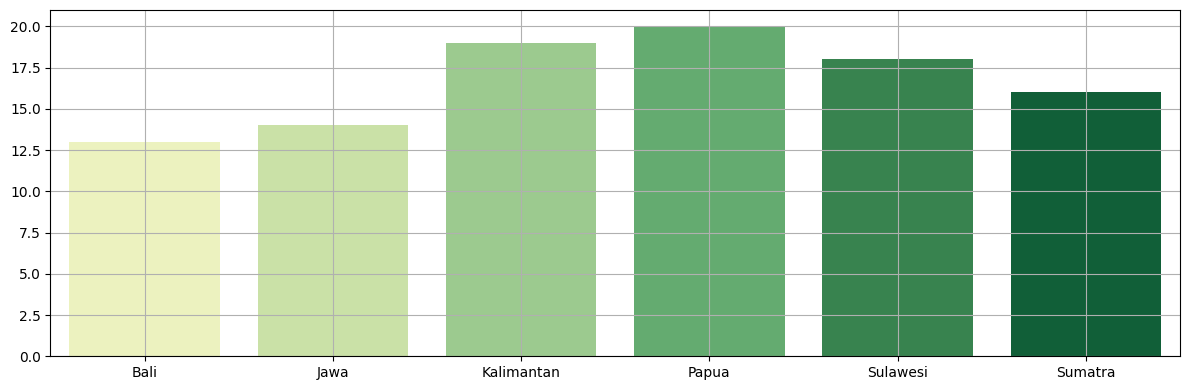

In [112]:
fig, ax = plt.subplots(figsize= (12,4))

sns.barplot(data=df, x="Labels", y="Percent", lw=2.5, hue="Labels", palette="YlGn")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

In [113]:
df = unpivot(df_region, category)
df.tail(3)

,Category,Labels,Values,Percent
1,Office Supplies,East,184870,28.0
2,Office Supplies,South,109370,17.0
3,Office Supplies,West,218230,34.0


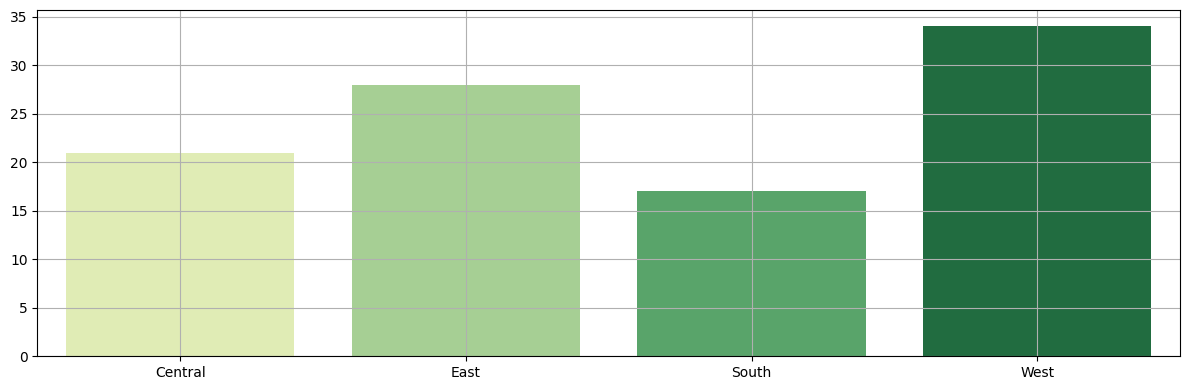

In [114]:
fig, ax = plt.subplots(figsize= (12,4))

sns.barplot(data=df, x="Labels", y="Percent", lw=2.5, hue="Labels", palette="YlGn")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)


plt.tight_layout()
plt.show()

In [115]:
df = unpivot(df_year, category)
df.tail(3)

,Category,Labels,Values,Percent
1,Office Supplies,2015,126560,19.0
2,Office Supplies,2016,170940,26.0
3,Office Supplies,2017,220720,34.0


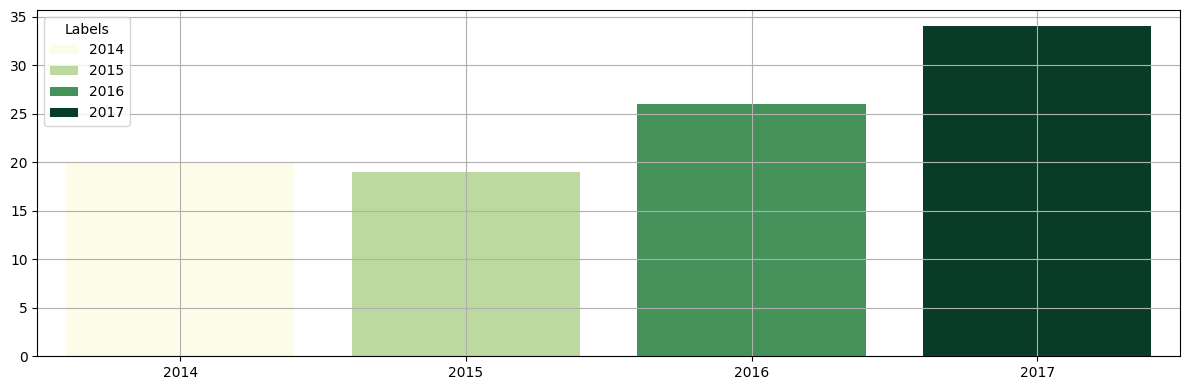

In [117]:
fig, ax = plt.subplots(figsize= (12,4))

sns.barplot(data=df, x="Labels", y="Percent", lw=2.5, hue="Labels", palette="YlGn")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)


plt.tight_layout()
plt.show()

In [118]:
df = unpivot(df_ship_mode, category)
df.tail(3)

,Category,Labels,Values,Percent
1,Office Supplies,Same Day,28890,4.0
2,Office Supplies,Second Class,146260,22.0
3,Office Supplies,Standard Class,381500,59.0


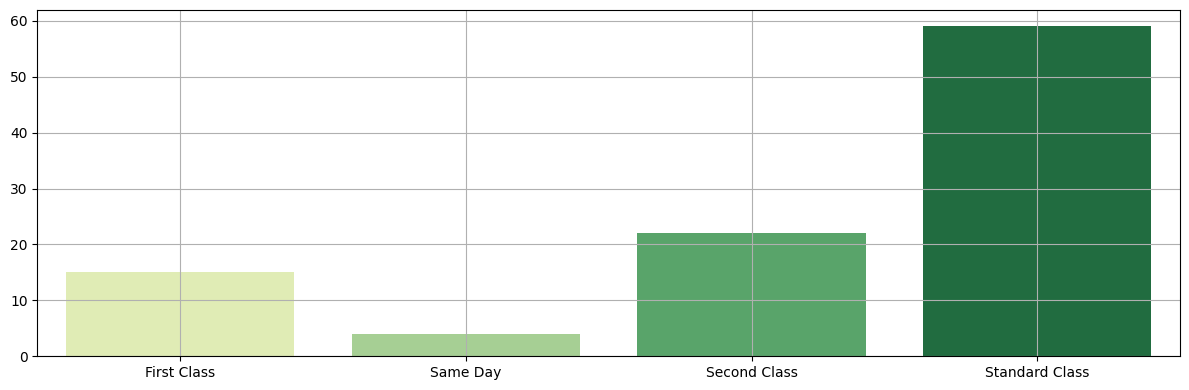

In [119]:
fig, ax = plt.subplots(figsize= (12,4))

sns.barplot(data=df, x="Labels", y="Percent", lw=2.5, hue="Labels", palette="YlGn")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)


plt.tight_layout()
plt.show()